In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


housing = pd.read_csv("files/housing.csv")
housing_cat = housing[["ocean_proximity"]]
housing_num = housing.select_dtypes(np.number)

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy= "median")),
    ("standardscalr", StandardScaler())
])

In [6]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy= "most_frequent")),
    ("onehot", OneHotEncoder(sparse= False, handle_unknown= "ignore"))
])

In [9]:
cat_attr = housing_cat.columns

In [10]:
num_attr = housing_num.columns

In [12]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attr ),
    ("cat", cat_pipeline, cat_attr )
])

In [15]:
arr = preprocessing.fit_transform(housing)

C:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
clms = preprocessing.get_feature_names_out()
clms

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income', 'num__median_house_value',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

In [17]:
df = pd.DataFrame(arr, columns= clms)

In [18]:
df

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,num__median_house_value,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,0.0,1.0,0.0,0.0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num__longitude                   20640 non-null  float64
 1   num__latitude                    20640 non-null  float64
 2   num__housing_median_age          20640 non-null  float64
 3   num__total_rooms                 20640 non-null  float64
 4   num__total_bedrooms              20640 non-null  float64
 5   num__population                  20640 non-null  float64
 6   num__households                  20640 non-null  float64
 7   num__median_income               20640 non-null  float64
 8   num__median_house_value          20640 non-null  float64
 9   cat__ocean_proximity_<1H OCEAN   20640 non-null  float64
 10  cat__ocean_proximity_INLAND      20640 non-null  float64
 11  cat__ocean_proximity_ISLAND      20640 non-null  float64
 12  cat__ocean_proximi

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'num__longitude'}>,
        <Axes: title={'center': 'num__latitude'}>,
        <Axes: title={'center': 'num__housing_median_age'}>,
        <Axes: title={'center': 'num__total_rooms'}>],
       [<Axes: title={'center': 'num__total_bedrooms'}>,
        <Axes: title={'center': 'num__population'}>,
        <Axes: title={'center': 'num__households'}>,
        <Axes: title={'center': 'num__median_income'}>],
       [<Axes: title={'center': 'num__median_house_value'}>,
        <Axes: title={'center': 'cat__ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'cat__ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'cat__ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'cat__ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'cat__ocean_proximity_NEAR OCEAN'}>,
        <Axes: >, <Axes: >]], dtype=object)

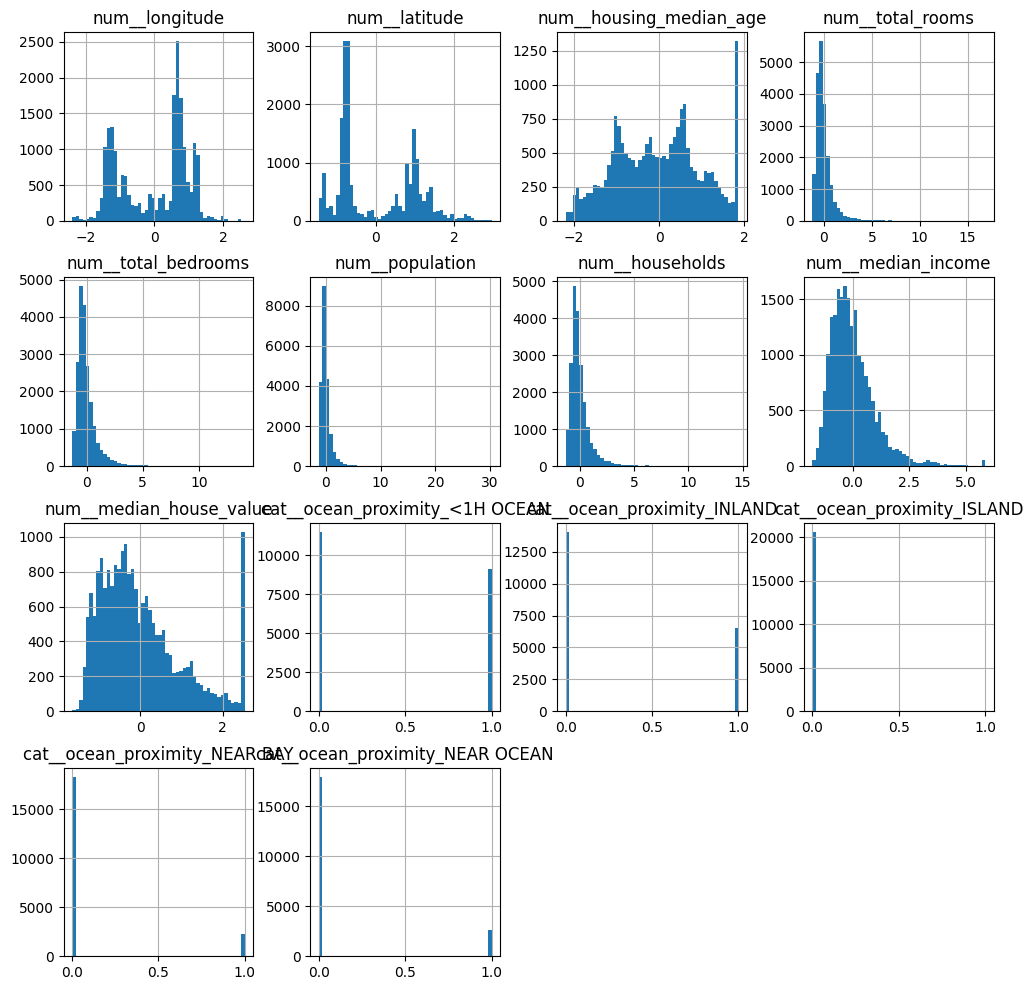

In [24]:
df.hist(bins = 50, figsize=(12,12))

In [34]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attr[0:2] ),
    ("cat", cat_pipeline, cat_attr ),
    ("pass", "passthrough", [num_attr[4]]),
    ("drops", "drop", num_attr[-1])
],
remainder = num_pipeline)

In [36]:
arr = preprocessing.fit_transform(housing)
arr

C:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.32783522,  1.05254828,  0.        , ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455,  0.        , ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  0.        , ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747,  0.        , ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747,  0.        , ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627,  0.        , ..., -0.03397701,
         0.07967221, -0.78012947]])

In [37]:
arr.shape

(20640, 13)

In [38]:
preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'pass__total_bedrooms',
       'remainder__housing_median_age', 'remainder__total_rooms',
       'remainder__population', 'remainder__households',
       'remainder__median_income'], dtype=object)

In [45]:
full_preprocessing = ColumnTransformer([
    ("num", num_pipeline, ["longitude", "latitude"]),
    ("cat", cat_pipeline, ["ocean_proximity"]),
    ("pass", "passthrough", ["median_house_value"]),
    ("drops", "drop", ["population"])
    
],
    remainder = num_pipeline
)

In [46]:
full_preprocessing.fit_transform(housing)

C:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.32783522,  1.05254828,  0.        , ..., -0.97247648,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455,  0.        , ...,  1.35714343,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  0.        , ..., -0.82702426,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747,  0.        , ..., -0.12360781,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747,  0.        , ..., -0.30482697,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627,  0.        , ...,  0.18875678,
         0.07967221, -0.78012947]])

In [47]:
full_preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'pass__median_house_value',
       'remainder__housing_median_age', 'remainder__total_rooms',
       'remainder__total_bedrooms', 'remainder__households',
       'remainder__median_income'], dtype=object)

In [48]:
housing[num_attr[4]]

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [49]:
housing["median_house_value"]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [52]:
type(num_attr[4])

str

In [51]:
num_attr[-1]

'median_house_value'